In [2]:
import pandas as pd 
df = pd.read_csv("Speed+Dating+Data.csv", encoding='latin1')
df.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

In [3]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [5]:
missing_values = df.isnull().sum()
print(missing_values)




iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64


## Shape

In [6]:
#Proportion homme/femme
fig = px.pie(df, names = "gender")
fig.show()

In [7]:
#Proportion de match 
df_match = df["match"].value_counts().reset_index()
df_match.head()
fig = px.pie(df_match, names = "match", values = "count")
fig.show()

In [8]:
#répond au deuxième et troisième questionnaire 
T2 =df["satis_2"].isnull().sum()
print(T2)
len(df)

915


8378

In [9]:
#est-ce que les matchs se sont concrétisés ? 
fig2 = go.Figure()
fig2.add_trace(go.Histogram(x = df["you_call"], opacity=0.5, name='Calls'))
fig2.add_trace(go.Histogram(x = df["them_cal"], opacity=0.5, name='Contacted'))
fig2.update_layout(
    title='Contact pour un second rdv',
    xaxis_title='Nombre de contact',
    yaxis_title='Count',
    barmode='overlay',  # This will superimpose the histograms
    legend_title='Contact',
    template='plotly_white'
)
fig2.show()

In [10]:
# Create a pie chart using go.Pie()
fig2 = go.Figure()

# Add a pie chart trace
fig2.add_trace(go.Pie(labels=df["date_3"].value_counts().index, 
                      values=df["date_3"].value_counts().values, 
                      name='Been on a date'))

# Update layout specifically for a pie chart
fig2.update_layout(
    title='% de second rdv',
    legend_title='Date 3',
    template='plotly_white')

In [11]:
#distrution de l'âge en fonction d'homme et femme #à vérifier 
fig = px.histogram(df, x= "age", color = "gender")
fig.show()

In [12]:
#Fréquence de sortie 

fig = px.histogram(df, x="go_out", color = "gender")
fig.show()

In [13]:
#Objectif en venant à cet event
fig = go.Figure()
fig.add_trace(go.Histogram(x=df[df["gender"] == 0]["goal"], opacity=0.5, name='Femme', marker_color='blue'))
fig.add_trace(go.Histogram(x=df[df["gender"] == 1]["goal"], opacity=0.5, name='Homme', marker_color='red'))
fig.show()


In [14]:
#Proportion des decisions en fonction du genre
df_like = df[["dec", "gender"]]
df_like.head()

fig=px.pie(df_like, names= "gender", values="dec")
fig.show()

### Slide 1 : La perception des attributs change-t-elle avant et après un rendez-vous ?

In [15]:
filtered_df = df[(df['attr1_2'].notna()) | (df['attr1_3'].notna())]
filtered_df.head()


iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   

   fun5_3  amb5_3  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN  

[5 rows x 195 columns]

In [16]:
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
    for i in range(1, 4):
        column_name = f'{attr}1_{i}'
        mean_values.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': filtered_df[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', color='Category', markers=True, 
              title='We want to know what you look for in the opposite sex. ')
fig.show()


In [17]:
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
    for i in range(1, 4):
        column_name = f'{attr}2_{i}'
        mean_values.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': filtered_df[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', color='Category', markers=True, 
              title='What do you think the opposite sex looks for in a date?')
fig.show()

In [18]:
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
    for i in range(1, 4):
        column_name = f'{attr}4_{i}'
        mean_values.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': filtered_df[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', color='Category', markers=True, 
              title='what you think MOST of your fellow men/women look for in the opposite sex.')
fig.show()

In [210]:
df_dec_no= filtered_df[filtered_df["dec"]==0]
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
        column_name = f'{attr}'
        mean_values.append({
            'Attribute': attr, 
            'Mean': df_dec_yes[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', markers=True, 
              title='Evaluation on the score card ')
fig.show()

#à comparer avec match ou non 

In [211]:
df_dec_yes = filtered_df[filtered_df["match"]== 1]
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
        column_name = f'{attr}'
        mean_values.append({
            'Attribute': attr, 
            'Mean': df_dec_yes[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', markers=True, 
              title='Evaluation on the score card ')
fig.show()

#à comparer avec match ou non 


### Importance des attributs avant, pendant, après date 

In [ ]:
import plotly.graph_objects as go

# First set of data (Mean per attribute category)
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values_1 = []
for attr in attributes:
    for i in range(1,4):  # Using just 2 categories for simplicity, change to 4 if needed
        column_name = f'{attr}1_{i}'
        mean_values_1.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': filtered_df[column_name].mean()
        })

# Convert to DataFrame
mean_df_1 = pd.DataFrame(mean_values_1)

# Second set of data (Overall Mean per attribute)
mean_values_2 = []
for attr in attributes:
    column_name = f'{attr}'
    mean_values_2.append({
        'Attribute': attr, 
        'Mean': filtered_df[column_name].mean()
    })

# Convert to DataFrame
mean_df_2 = pd.DataFrame(mean_values_2)

# Create the figure with two y-axes
fig = go.Figure()

# Add the first trace (line with multiple categories on primary y-axis)
for category in mean_df_1['Category'].unique():
    fig.add_trace(go.Scatter(
        x=mean_df_1[mean_df_1['Category'] == category]['Attribute'],
        y=mean_df_1[mean_df_1['Category'] == category]['Mean'],
        mode='lines+markers',
        name=f'Form {category}',
        yaxis='y1'
    ))

# Add the second trace (overall mean on secondary y-axis)
fig.add_trace(go.Scatter(
    x=mean_df_2['Attribute'],
    y=mean_df_2['Mean'],
    mode='lines+markers',
    name='ScoreCard',
    yaxis='y2'
))

# Update the layout to include two y-axes
fig.update_layout(
    title='Comparison importance and scorecard evaluation',
    xaxis_title='Attribute',
    
    # Y-Axis on the left (primary)
    yaxis=dict(
        title='Mean by form',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    
    # Y-Axis on the right (secondary)
    yaxis2=dict(
        title='ScoreCard',
        titlefont=dict(color='violet'),
        tickfont=dict(color='violet'),
        overlaying='y',  # Overlays the y-axis
        side='right'     # Puts this axis on the right side
    ),
    
    # General settings
    legend_title="Legend",
    template='plotly_white'
)

In [20]:
df_male = filtered_df[filtered_df["gender"]==1]
df_female = filtered_df[filtered_df["gender"]==0]


In [ ]:
# List of attributes
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

# Collect mean values dynamically
mean_values = []
for attr in attributes:
        column_name = f'{attr}1_s'
        mean_values.append({
            'Attribute': attr, 
            'Mean': filtered_df[column_name].mean()
        })

# Convert to DataFrame
mean_df = pd.DataFrame(mean_values)

# Plotting with Plotly Express
fig = px.line(mean_df, x='Attribute', y='Mean', markers=True, 
              title='Importance of attributes at half way')
fig.show()


## Quelles sont les caractéristiques les moins désirables chez un partenaire masculin ? Cela diffère-t-il pour les partenaires féminines ? 

In [30]:
import pandas as pd
import plotly.graph_objects as go

attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

mean_values_homme = []
mean_values_femme = []

for attr in attributes:
    for i in range(1, 4):  
        column_name_homme = f'{attr}1_{i}'
        mean_values_homme.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': filtered_df[column_name_homme].mean()
        })

        column_name_femme = f'{attr}2_{i}'  # Assuming you have a similar pattern for femmes
        mean_values_femme.append({
            'Attribute': attr, 
            'Category': f'{i}', 
            'Mean': filtered_df[column_name_femme].mean()
        })

# Creating DataFrames for hommes and femmes
mean_df_homme = pd.DataFrame(mean_values_homme)
mean_df_femme = pd.DataFrame(mean_values_femme)

# Plotting
fig = go.Figure()

# Adding homme trace
fig.add_trace(go.Bar(
    x = mean_df_homme["Attribute"],
    y = mean_df_homme["Mean"],
    name = "Homme"
))

# Adding femme trace
fig.add_trace(go.Bar(
    x = mean_df_femme["Attribute"],
    y = mean_df_femme["Mean"], 
    name = "Femme"
))

# Updating layout
fig.update_layout(
    title='Moyenne des attributs homme/femme (ce quils recherchent)',
    xaxis_title='Attributs',
    yaxis_title='Moyenne'
)

fig.show()

    

In [41]:
df_male
df_male_yes = df_male[df_male["dec"] == 0]
df_female_yes = df_female[df_female["dec"] == 0]

In [42]:

attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']


mean_values = []
for attr in attributes:
        column_name = f'{attr}'
        mean_values.append({
            'Attribute': attr, 
            'Mean': df_male_yes[column_name].mean()
        })


mean_df = pd.DataFrame(mean_values)

mean_values2 = []
for attr in attributes:
        column_name = f'{attr}'
        mean_values2.append({
            'Attribute': attr, 
            'Mean': df_female_yes[column_name].mean()
        })


mean_df2 = pd.DataFrame(mean_values2)

fig = go.Figure()
fig.add_trace(go.Bar(
        x = mean_df["Attribute"],
        y = mean_df["Mean"],
        name = "Homme"
))

fig.add_trace(go.Bar(
        x = mean_df2["Attribute"],
        y = mean_df2["Mean"], 
        name = "Femme"
))
fig.update_layout(
    title='Moyenne des attributs homme/femme suite au date',
    xaxis_title='Attributs')
    

fig.show()


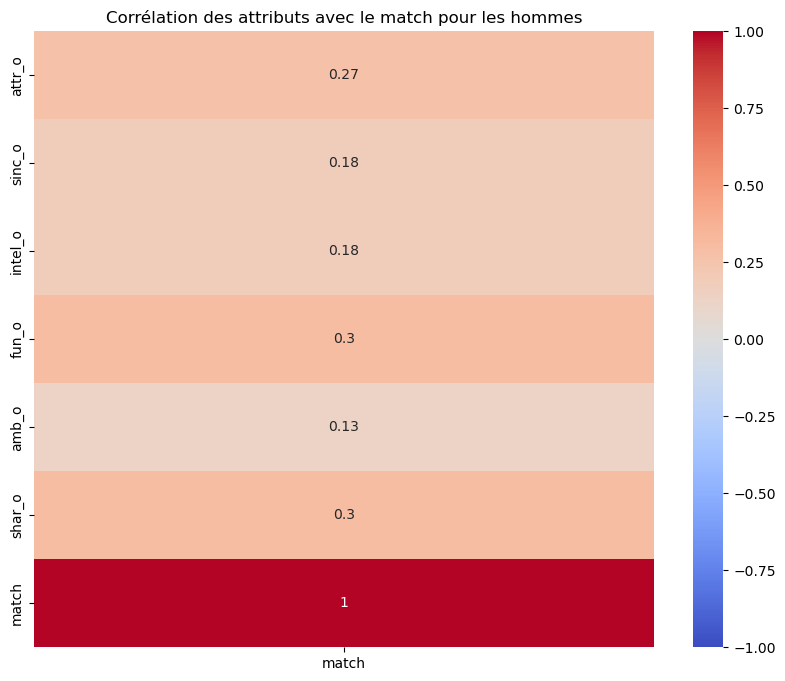

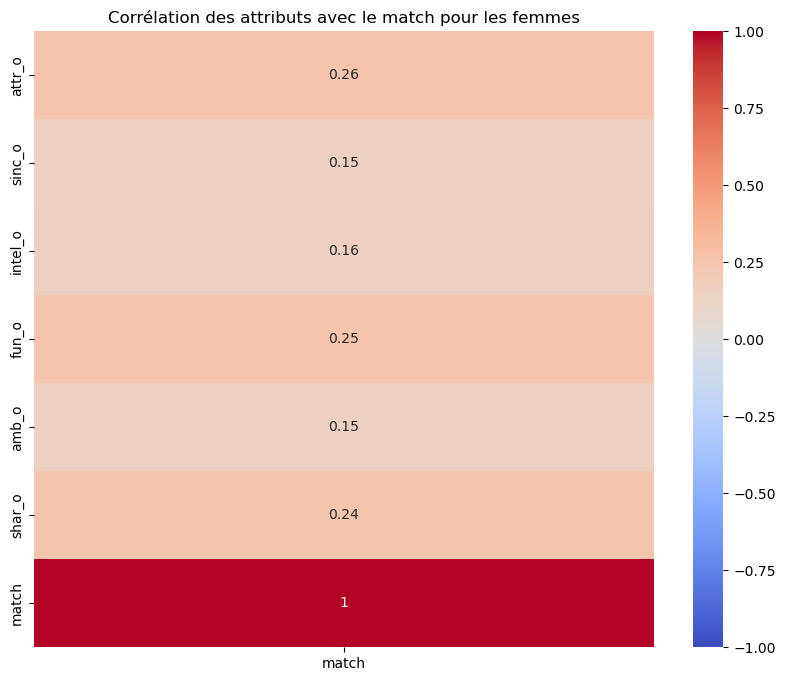

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Sélection des colonnes d'intérêt : décisions de match et attributs (attractivité, sincérité, etc.)
# Suppose que 'match' est la variable indiquant s'il y a eu un match (1 = oui, 0 = non)
# Les colonnes attr_o, sinc_o, etc. sont les notes données pour chaque attribut
attributes = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
correlation_data = df[attributes + ['match', 'gender']]

# Séparation des genres (0 = Femmes, 1 = Hommes)
male_data = correlation_data[correlation_data['gender'] == 1]
female_data = correlation_data[correlation_data['gender'] == 0]

# Calcul des corrélations
corr_male = male_data.corr()
corr_female = female_data.corr()

# Heatmap pour les hommes
plt.figure(figsize=(10, 8))
sns.heatmap(corr_male[['match']].drop('gender'), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélation des attributs avec le match pour les hommes")
plt.show()

# Heatmap pour les femmes
plt.figure(figsize=(10, 8))
sns.heatmap(corr_female[['match']].drop('gender'), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélation des attributs avec le match pour les femmes")
plt.show()

Autres graphiques à faire : 
pour le côté désirable, faut regarder désirable en terme d'importance et ce que l'autre recherche


## Quelle est l'importance de l’intelligence dans la sélection d'un partenaire par rapport à leur impact réel ? 


In [59]:
#Importance de l'attractivité lors du sign up en fonction de match ou non
fig = px.box(filtered_df, x ="match", y = "intel1_1")
fig.show(
)

In [58]:
fig = px.box(filtered_df, x ="match", y = "intel")
fig.show()

In [57]:
fig = px.box(filtered_df, x ="dec", y = "intel7_3")
fig.show()

In [56]:
fig = px.box(filtered_df, x ="match", y = "intel1_s")
fig.show()

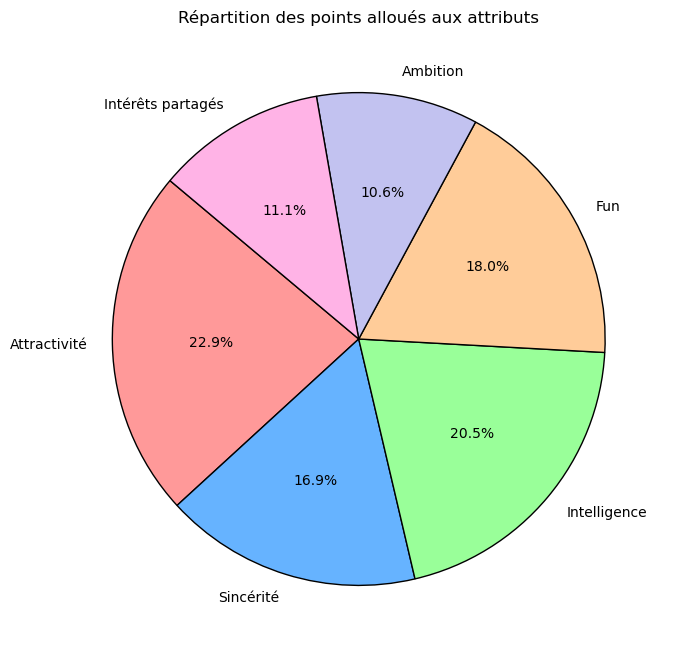

In [62]:
# Sélectionner les colonnes correspondant aux points alloués aux différents attributs lors de l'inscription
# Par exemple, supposons que les colonnes sont : 'attr1_1' (Attractivité), 'sinc1_1' (Sincérité), etc.
attributes_points = df_match_ues[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]

# Calculer la moyenne des points alloués à chaque attribut
mean_points = attributes_points.mean()

# Libellés pour le diagramme circulaire
labels = ['Attractivité', 'Sincérité', 'Intelligence', 'Fun', 'Ambition', 'Intérêts partagés']

# Couleurs pour chaque section (facultatif)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Créer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(mean_points, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Ajouter un titre
plt.title('Répartition des points alloués aux attributs')

# Afficher le graphique
plt.show()

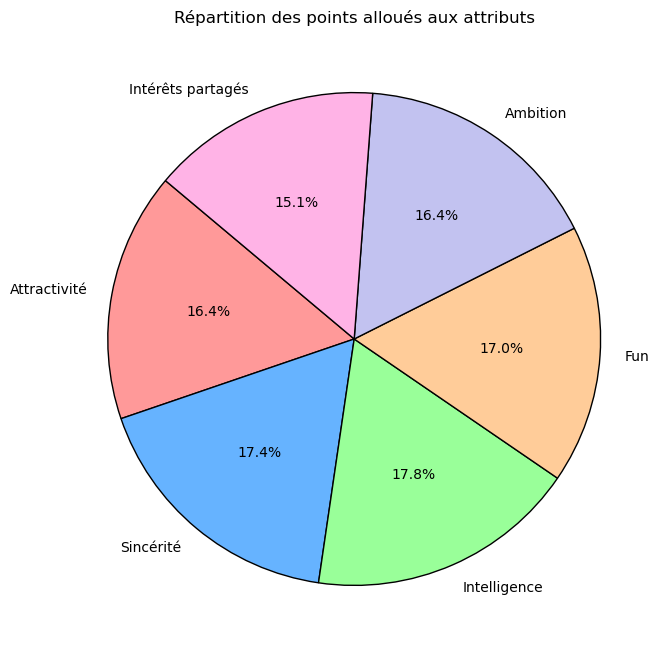

In [61]:
df_match_ues = df[df["match"]==1]
# Sélectionner les colonnes correspondant aux points alloués aux différents attributs lors de l'inscription
# Par exemple, supposons que les colonnes sont : 'attr1_1' (Attractivité), 'sinc1_1' (Sincérité), etc.
attributes_points = df_match_ues[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]

# Calculer la moyenne des points alloués à chaque attribut
mean_points = attributes_points.mean()

# Libellés pour le diagramme circulaire
labels = ['Attractivité', 'Sincérité', 'Intelligence', 'Fun', 'Ambition', 'Intérêts partagés']

# Couleurs pour chaque section (facultatif)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Créer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(mean_points, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Ajouter un titre
plt.title('Répartition des points alloués aux attributs')

# Afficher le graphique
plt.show()

## Les intérêts communs sont-ils plus importants qu'une même origine racial partagé ?


In [ ]:
#% de same race
df_match = df["samerace"].value_counts().reset_index()
df_match.head()
fig = px.pie(df_match, names = "samerace", values = "count")
fig.show()

In [ ]:
df_question3 = filtered_df.groupby("samerace")["match"].sum().reset_index()
df_question3.head()
fig = px.pie(df_question3, names = "samerace", values = "match")
fig.show()

In [ ]:
fig = px.box(filtered_df, x= "match", y = "imprace")
fig.show()

In [ ]:
df_question3 = filtered_df.groupby("int_corr")["match"].sum().reset_index()
display(df_question3)

fig = px.histogram(df_question3, x= "int_corr", y = "match")
fig.show()

int_corr  match
0       -0.83      2
1       -0.73      0
2       -0.70      0
3       -0.64      0
4       -0.63      2
..        ...    ...
150      0.85      0
151      0.87      0
152      0.88      0
153      0.90      0
154      0.91      0

[155 rows x 2 columns]

In [ ]:
fig = px.box(filtered_df, x="match", y = "shar1_1")
fig.show()

In [ ]:
fig = px.box(filtered_df, x="match", y = "shar")
fig.show()

### Les gens peuvent-ils prédire avec précision leur propre valeur perçue sur le marché des rencontres ?

In [ ]:
#distribution
mean_expnum = filtered_df["expnum"].mean()
median_expnum = filtered_df["expnum"].median()
std_expnum = filtered_df["expnum"].std()
print(mean_expnum, median_expnum, std_expnum)

fig = px.histogram(filtered_df, x= "expnum")
fig.show()

5.336710369487485 4.0 4.459501634132438


In [64]:
df["diff_attr_estimation"] = df["attr_o"] - df["attr5_1"]
df["diff_sinc_estimation"] = df["sinc_o"] - df["sinc5_1"]
df["diff_intel_estimation"] = df["intel_o"] - df["intel5_1"]
df["diff_fun_estimation"] = df["fun_o"] - df["fun5_1"]
df["diff_amb_estimation"] = df["amb_o"] - df["amb5_1"]


In [66]:
fig = px.histogram(df, x="diff_attr_estimation")
fig.show(
)

In [75]:

fig = px.box(df, x="diff_intel_estimation")
fig.show(
)

In [ ]:
df["attr_perçu"] = df["attr3_1"]- df["attr"]
df["sinc_perçu"] = df["sinc3_1"]- df["sinc"]
df["intel_perçu"] = df["intel3_1"]- df["intel"]
df["fun_perçu"] = df["fun3_1"]- df["fun"]
df["amb_perçu"] = df["amb3_1"]- df["amb"]

In [ ]:
df["attr_perçu"].mean()
df["sinc_perçu"].mean()
df["intel_perçu"].mean()
df["fun_perçu"].mean()
df["amb_perçu"].mean()

0.8149273447820343

In [ ]:
fig = px.box(df, x="attr_perçu")
fig.show()

In [ ]:
fig = px.box(df, x="intel_perçu")
fig.show()

In [81]:
fig = px.histogram(df, x="prob", y = "dec_o")

fig.show()

In [135]:
df_group_match = df.groupby("iid")[["expnum", "match", "match_es"]].sum().reset_index()

mean_match = df_group_match.mean()

df_group_match_expected = df.groupby("iid")[["expnum", "match",  "match_es"]].mean().reset_index()

df_group_match["diff_match"]= df_group_match["match"] - df_group_match_expected["match_es"]
print(df_group_match)

fig = px.histogram(df_group_match_expected, x=["match"])
fig.show()
print(df_group_match["diff_match"].mean())

df_group_match_expected["round"] = df["round"]



df_group_match_expected["proba_match_es"] = df_group_match_expected["match_es"]/df_group_match_expected ["round"]
df_group_match_expected = df_group_match_expected.dropna(subset=["match_es", "round"])
display(df_group_match_expected)

fig2 = px.histogram(df_group_match_expected, x="proba_match_es")
fig2.show()

     iid  expnum  match  match_es  diff_match
0      1    20.0      4      40.0         0.0
1      2    50.0      2      30.0        -1.0
2      3    20.0      0       0.0         NaN
3      4    20.0      2      20.0         0.0
4      5   100.0      2       0.0         NaN
..   ...     ...    ...       ...         ...
546  548     0.0      5     110.0         0.0
547  549     0.0      5      66.0         2.0
548  550     0.0      4     132.0        -2.0
549  551     0.0      2      66.0        -1.0
550  552     0.0      6      66.0         3.0

[551 rows x 5 columns]


-0.6365344467640918


iid  expnum     match  match_es  round  proba_match_es
0      1     2.0  0.400000       4.0     10        0.400000
1      2     5.0  0.200000       3.0     10        0.300000
3      4     2.0  0.200000       2.0     10        0.200000
5      6     3.0  0.200000       4.0     10        0.400000
6      7     3.0  0.200000       2.0     10        0.200000
..   ...     ...       ...       ...    ...             ...
546  548     NaN  0.227273       5.0     19        0.263158
547  549     NaN  0.227273       3.0     19        0.157895
548  550     NaN  0.181818       6.0     19        0.315789
549  551     NaN  0.090909       3.0     19        0.157895
550  552     NaN  0.272727       3.0     19        0.157895

[479 rows x 6 columns]

### En termes d'obtenir un deuxième rendez-vous, vaut-il mieux être le premier speed date de la soirée ou le dernier ?

In [150]:
df_round_0_6 = df[(df["round"] >= 0) & (df["round"] <= 6)]

# Filtrer les rounds entre 7 et 10 inclus
df_round_7_10 = df[(df["round"] >= 7) & (df["round"] <= 10)]

# Filtrer les rounds entre 11 et 15 inclus
df_round_11_15 = df[(df["round"] >= 11) & (df["round"] <= 15)]

# Filtrer les rounds supérieurs ou égaux à 16
df_round_sup_16 = df[df["round"] >= 16]

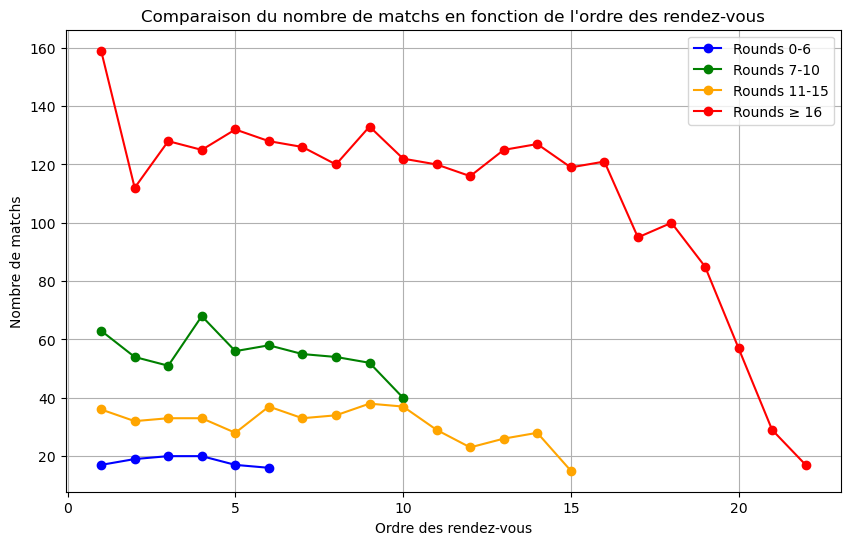

In [167]:
# Calculer le nombre de matchs pour chaque ordre de rendez-vous dans chaque groupe
matches_by_order_0_6 = df_round_0_6.groupby('order')['dec'].sum().reset_index()
matches_by_order_7_10 = df_round_7_10.groupby('order')['dec'].sum().reset_index()
matches_by_order_11_15 = df_round_11_15.groupby('order')['dec'].sum().reset_index()
matches_by_order_sup_16 = df_round_sup_16.groupby('order')['dec'].sum().reset_index()

# Créer le graphique avec les 4 courbes superposées
plt.figure(figsize=(10, 6))

# Tracer pour rounds 0-6
plt.plot(matches_by_order_0_6['order'], matches_by_order_0_6['dec'], label='Rounds 0-6', marker='o', linestyle='-', color='blue')

# Tracer pour rounds 7-10
plt.plot(matches_by_order_7_10['order'], matches_by_order_7_10['dec'], label='Rounds 7-10', marker='o', linestyle='-', color='green')

# Tracer pour rounds 11-15
plt.plot(matches_by_order_11_15['order'], matches_by_order_11_15['dec'], label='Rounds 11-15', marker='o', linestyle='-', color='orange')

# Tracer pour rounds >= 16
plt.plot(matches_by_order_sup_16['order'], matches_by_order_sup_16['dec'], label='Rounds ≥ 16', marker='o', linestyle='-', color='red')

# Ajouter les titres et légendes
plt.title("Comparaison du nombre de matchs en fonction de l'ordre des rendez-vous")
plt.xlabel("Ordre des rendez-vous")
plt.ylabel("Nombre de matchs")
plt.legend(loc='upper right')

# Afficher le graphique
plt.grid(True)
plt.show()

In [180]:

# Sélectionner les colonnes d'intérêt : 'wave', 'order' et les notes d'attractivité, fun, sincérité
# On suppose que les colonnes sont 'wave', 'order', 'attr_o', 'fun_o', 'sinc_o'
attributes_data = df[['round', 'order', 'attr', 'fun', 'sinc', 'match']]

# Normaliser l'ordre des rendez-vous par wave
# Calculer le nombre maximum de rendez-vous dans chaque wave
attributes_data['max_order'] = attributes_data.groupby('round')['order'].transform('max')

# Créer une colonne 'order_normalized' qui représente la position relative du rendez-vous (entre 0 et 1)
attributes_data['order_normalized'] = attributes_data['order'] / attributes_data['max_order']

# Regrouper les données par ordre normalisé et calculer la moyenne des notes
attributes_by_order_normalized = attributes_data.groupby('order_normalized').mean().reset_index()

display(attributes_by_order_normalized)


fig =px.histogram(attributes_data, x = "order_normalized", y = "match")
fig.show()

C:\Users\leasc\AppData\Local\Temp\ipykernel_13408\3326508498.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\leasc\AppData\Local\Temp\ipykernel_13408\3326508498.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



order_normalized     round      order      attr       fun      sinc  \
0            0.045455  22.00000   1.000000  6.113636  6.863636  7.395349   
1            0.047619  21.00000   1.000000  6.404762  6.309524  7.428571   
2            0.050000  20.00000   1.000000  6.344828  7.017857  8.224138   
3            0.052632  19.00000   1.000000  6.661765  6.941176  8.294118   
4            0.055556  18.00000   1.000000  6.810811  7.013889  8.138889   
..                ...       ...        ...       ...       ...       ...   
113          0.947368  19.00000  18.000000  6.242424  6.709677  7.250000   
114          0.950000  20.00000  19.000000  6.888889  6.711538  7.296296   
115          0.952381  21.00000  20.000000  6.214286  5.463415  6.365854   
116          0.954545  22.00000  21.000000  5.833333  6.472222  6.416667   
117          1.000000  15.23049  15.205082  6.227273  6.536750  7.188462   

        match  max_order  
0    0.318182  22.000000  
1    0.285714  21.000000  
2    0.241379  20.000000  
3    0.294118  19.000000  
4    0.306667  18.000000  
..        ...        ...  
113  0.058824  19.000000  
114  0.275862  20.000000  
115  0.142857  21.000000  
116  0.045455  22.000000  
117  0.212341  15.205082  

[118 rows x 8 columns]

### Est-ce que le lifestyle influence les matchs ? 

In [ ]:
fig = px.box(df, x = "match", y = "goal")
fig.show()

### Slide 6 : Le lifestyle influence-t-il les matchs ?

fig = px.box()

In [182]:
fig = px.histogram(df, x="concerts", y = "match")
fig.show()

In [186]:
fig = px.histogram(df, x="yoga", y = "match")
fig.show()

In [188]:
fig = px.histogram(df, x="theater", y = "match")
fig.show()

In [190]:
fig = px.histogram(df, x="hiking", y = "match")
fig.show()

In [192]:
fig = px.histogram(df, x="music", y = "match")
fig.show()


In [194]:
fig = px.histogram(df, x="clubbing", y = "match")
fig.show()

In [209]:
fig = px.histogram(df, x = "go_out", y = "match")
fig.show()

In [207]:
df_go_out = df["go_out"].value_counts().reset_index()
print(df_go_out)

fig = px.pie(df_go_out, names = "go_out", values = "count")
fig.show()

   go_out  count
0     2.0   2990
1     1.0   2610
2     3.0   1949
3     4.0    450
4     5.0    164
5     6.0     99
6     7.0     37


In [ ]:
fig = px.histogram(df, x = "goal", y = "match")
fig.show()